

>Estefania Gil Tejada
1000556567
Ing. Industrial.


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'

!chmod 600 kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


 94% 28.0M/29.9M [00:00<00:00, 155MB/s] 
100% 29.9M/29.9M [00:00<00:00, 151MB/s]


In [4]:
!unzip udea*.zip > /dev/null
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


A partir de los resultados del analisis wc *.csv podemos concluir que En total hay más de 1.2 millones de filas distribuidas entre los archivos train.csv, test.csv y submission_example.csv.

Esto indica que estamos trabajando con un dataset de tamaño grande, ideal para aplicar modelos de aprendizaje automático.



In [5]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


El archivo train.csv tiene 692500 filas (Cada una representa a un estudiante) y 21 columnas (Que representan las variables).

In [6]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Tras revisar los datos, hemos identificado que la columna 'FAMI_TIENETINTERNET' está repetida, con una segunda columna denominada 'FAMI_TIENETINTERNET.1'. Esta columna duplicada debe ser eliminada. Además, algunas categorías, como 'FAMI_TIENELAVADORA' y 'FAMI_TIENEAUTOMOVIL', podrían no ser relevantes para el análisis y es posible que se eliminen. Para llevar a cabo una 'limpieza de datos' adecuada, procederemos a clasificar las categorías y determinar, según su relevancia, cuáles eliminar.

**Tenemos que predecir la colimna rendimiento global utilizando la información obtenida en las otras columnas**

In [8]:
for col in z.columns:
    print(col)


ID
PERIODO
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL
coef_1
coef_2
coef_3
coef_4


# Categorización de variables

##variables no necesarias:
PERIODO

coef_1, coef_2, coef_3, coef_4

FAMI_TIENEAUTOMOVIL (si tiene automóvil)

FAMI_TIENELAVADORA (si tiene lavadora)

FAMI_TIENEINTERNET.1 (por ser repetida de FAMI_TIENEINTERNET)

ESTU_PRIVADO_LIBERTAD

In [17]:
# Definir las columnas a eliminar
#variables_a_descartar = ['PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4',
#                         'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA', 'FAMI_TIENEINTERNET.1']

# Eliminar las columnas no relevantes
#z = z.drop(columns=variables_a_descartar)

# Verificar el resultado
#z.head()

z = z.drop(columns=['ESTU_PRIVADO_LIBERTAD'])
z.head()

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,No,Si,Postgrado,medio-alto
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,No,Si,Técnica o tecnológica incompleta,bajo
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,No,No,Secundaria (Bachillerato) completa,bajo
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,No,Si,Secundaria (Bachillerato) completa,alto
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,No,Si,Primaria completa,medio-bajo


In [19]:
for col in z.columns:
    print(col)

ID
ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL


In [20]:
categoricas = [
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'RENDIMIENTO_GLOBAL'
]

numericas = [
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA'
]
# Convertir columnas categóricas
for col in categoricas:
    z[col] = z[col].astype('category')


In [21]:
print(z['RENDIMIENTO_GLOBAL'].value_counts())


RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


La variable RENDIMIENTO_GLOBAL es la que vamos a predecir mediante el modelo. Esta variable representa el desempeño general de los estudiantes y está clasificada en cuatro categorías: bajo, medio-bajo, medio-alto y alto. Con base en los datos inicialmente disponibles, se observa que las frecuencias están bastante equilibradas entre las categorías, lo cual es favorable para el entrenamiento del modelo. La categoría con mayor cantidad de estudiantes es alto, seguida muy de cerca por bajo, medio-bajo y medio-alto, siendo esta última la de menor frecuencia. Esta distribución sugiere una relativa uniformidad en el rendimiento global de los estudiantes evaluados.

In [22]:
print(z['ESTU_PRGM_DEPARTAMENTO'].value_counts())


ESTU_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


La variable ESTU_PRGM_DEPARTAMENTO indica el departamento donde los estudiantes cursan su programa académico. Al analizar su distribución, se observa que hay una alta concentración en ciertas regiones del país. Bogotá encabeza la lista con 282.159 estudiantes, lo que representa una parte significativa del total. Le siguen departamentos como Antioquia (83.607), Valle del Cauca (44.588) y Atlántico (41.020). En contraste, hay departamentos con muy baja representación, como Amazonas (40 estudiantes), Guaviare (37), Vaupés (14) y San Andrés (10). Esta distribución sugiere una fuerte centralización de la educación superior en las principales ciudades del país, mientras que en algunas regiones más apartadas el acceso es considerablemente más limitado.

In [23]:
print(z['ESTU_PRGM_ACADEMICO'].value_counts().head(10))


ESTU_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64


La variable ESTU_PRGM_ACADEMICO representa el programa académico que cursa cada estudiante. Según la distribución de los datos, los programas más comunes son Derecho (53.244 estudiantes), Administración de Empresas (sumando ambas variantes llega a más de 76.000 estudiantes), Contaduría Pública (39.664) y Psicología (aproximadamente 49.309 si se suman ambas formas de escritura). También se destacan carreras como Ingeniería Industrial (28.481), Ingeniería Civil (19.487), Medicina (18.099) e Ingeniería de Sistemas (17.150). Este panorama evidencia una alta concentración en programas tradicionales y de amplia demanda laboral. Además, se observan posibles duplicidades en los nombres de programas debido a diferencias en la escritura (por ejemplo, PSICOLOGÍA y PSICOLOGIA), lo cual podría requerir una normalización de los datos para mejorar la calidad del análisis.



<ipython-input-26-de838dfd184a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=z, x='RENDIMIENTO_GLOBAL', order=z['RENDIMIENTO_GLOBAL'].value_counts().index, palette='Set2')


Text(0, 0.5, 'Número de Estudiantes')

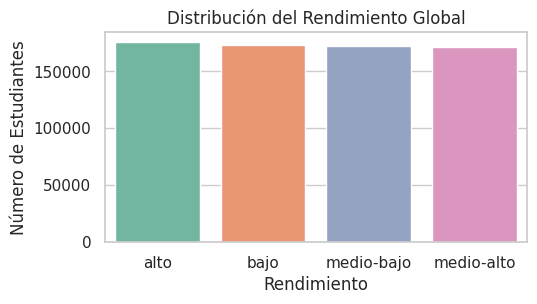

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Histograma 1: Distribución del rendimiento global
plt.subplot(2, 2, 1)
sns.countplot(data=z, x='RENDIMIENTO_GLOBAL', order=z['RENDIMIENTO_GLOBAL'].value_counts().index, palette='Set2')
plt.title('Distribución del Rendimiento Global')
plt.xlabel('Rendimiento')
plt.ylabel('Número de Estudiantes')


Distribución equitativa: Todas las categorías parecen tener una cantidad similar de estudiantes, rondando los 150,000 en cada grupo. Esto sugiere una distribución balanceada del rendimiento académico.


<ipython-input-29-51ea55494938>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=z, y='ESTU_VALORMATRICULAUNIVERSIDAD', order=z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette='coolwarm')


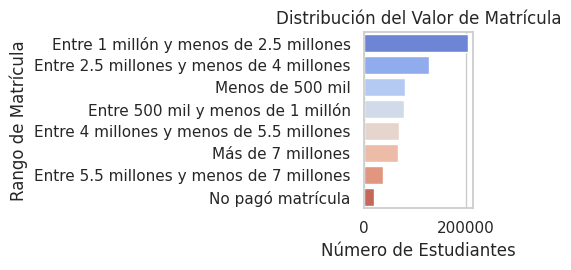

In [29]:
# Histograma 4: Valor de matrícula
plt.subplot(2, 2, 4)
sns.countplot(data=z, y='ESTU_VALORMATRICULAUNIVERSIDAD', order=z['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette='coolwarm')
plt.title('Distribución del Valor de Matrícula')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Rango de Matrícula')

plt.tight_layout()
plt.show()

**Mayor concentración de estudiantes:** La mayoría de los estudiantes se encuentran en el rango de entre 1 millón y menos de 2.5 millones, lo que indica que este es el valor más común de matrícula.
**Menor presencia en rangos altos:** Los grupos que pagan más de 5.5 millones tienen una cantidad significativamente menor de estudiantes, lo que sugiere que son menos accesibles o comunes.
**Variabilidad en los costos:** Hay una amplia distribución de valores, con rangos que van desde menos de 500 mil hasta más de 7 millones, lo que refleja la diversidad en costos según instituciones o programas educativos.


In [30]:
# Mostrar las primeras filas de una columna específica
print("Primeras filas de FAMI_EDUCACIONMADRE:")
print(z['FAMI_EDUCACIONMADRE'].head())

# Ver los valores únicos de la variable RENDIMIENTO_GLOBAL
print("\nCategorías únicas en RENDIMIENTO_GLOBAL:")
print(z['RENDIMIENTO_GLOBAL'].unique())

# Contar cuántos estudiantes tienen computador
print("\nCantidad de estudiantes que tienen computador:")
print(z['FAMI_TIENECOMPUTADOR'].value_counts())

# Filtrar los estudiantes con rendimiento 'alto'
print("\nFiltrar estudiantes con RENDIMIENTO_GLOBAL 'alto':")
print(z[z['RENDIMIENTO_GLOBAL'] == 'alto'].head())

# Mostrar varias columnas al mismo tiempo
print("\nMostrar columnas ESTU_PRGM_ACADEMICO y RENDIMIENTO_GLOBAL:")
print(z[['ESTU_PRGM_ACADEMICO', 'RENDIMIENTO_GLOBAL']].head())

# Agrupar por FAMI_EDUCACIONPADRE y contar tipos de rendimiento
print("\nConteo de RENDIMIENTO_GLOBAL por nivel educativo del padre:")
print(z.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].value_counts())


Primeras filas de FAMI_EDUCACIONMADRE:
0                             Postgrado
1      Técnica o tecnológica incompleta
2    Secundaria (Bachillerato) completa
3    Secundaria (Bachillerato) completa
4                     Primaria completa
Name: FAMI_EDUCACIONMADRE, dtype: category
Categories (12, object): ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno',
                          'No Aplica', ..., 'Secundaria (Bachillerato) completa',
                          'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa',
                          'Técnica o tecnológica incompleta']

Categorías únicas en RENDIMIENTO_GLOBAL:
['medio-alto', 'bajo', 'alto', 'medio-bajo']
Categories (4, object): ['alto', 'bajo', 'medio-alto', 'medio-bajo']

Cantidad de estudiantes que tienen computador:
FAMI_TIENECOMPUTADOR
Si    597670
No     56727
Name: count, dtype: int64

Filtrar estudiantes con RENDIMIENTO_GLOBAL 'alto':
        ID         ESTU_PRGM_ACADEMICO

<ipython-input-30-30a1f12603c4>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(z.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].value_counts())


Con base en los datos analizados, se puede observar una relación entre el nivel educativo del padre y el rendimiento global del estudiante. En general, los estudiantes cuyos padres tienen niveles educativos más altos, como postgrado o educación profesional completa, tienden a obtener un mayor número de resultados en la categoría "alto" de rendimiento. Por ejemplo, los padres con postgrado concentran 23.856 estudiantes con rendimiento alto, mientras que en niveles como primaria incompleta la mayoría de los estudiantes se ubican en categorías más bajas, con 42.457 en rendimiento "bajo". Esta tendencia sugiere que el contexto educativo familiar puede influir de forma importante en el desempeño académico del estudiante. Esta variable será clave en el análisis posterior con modelos predictivos.